In [1]:
# 9. Многофакторный анализ
# Построить модель по многим факторам (образование, пол, вредные привычки и другие) и выяснить 
# какие из факторов статистически значимо влияют на уровень дохода.

In [2]:
from dataframes import dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Создание датафрейма

Составим список необходимых в работе столбцов

In [3]:
# Список нужных столбцов
columns_needed = ['age', 'educ', 'degree', 'marital', 'hrs1', 'hrs2', 'realrinc']

Создаем пустой датафрейм для объединения

In [4]:
# Создаём пустой датафрейм для объединения
df = pd.DataFrame()

Отбираем нужные столбцы из каждого датафрейма

In [5]:
# Проходим по каждому датафрейму
for year, dd in dataframes.items():
    available_columns = [col for col in columns_needed if col in dd.columns]
    print(available_columns, year)
    
    if available_columns:
        temp_df = dd[available_columns].copy()
        temp_df['year'] = int(year)  # Добавляем год опроса
        df = pd.concat([df, temp_df], ignore_index=True)

['age', 'educ', 'degree', 'marital', 'hrs1', 'hrs2', 'realrinc'] 2010
['age', 'educ', 'degree', 'marital', 'hrs1', 'hrs2', 'realrinc'] 2012
['age', 'educ', 'degree', 'marital', 'hrs1', 'hrs2', 'realrinc'] 2014
['age', 'educ', 'degree', 'marital', 'hrs1', 'hrs2', 'realrinc'] 2016
['age', 'educ', 'degree', 'marital', 'hrs1', 'hrs2', 'realrinc'] 2018
['age', 'educ', 'degree', 'marital', 'hrs1', 'hrs2', 'realrinc'] 2021
['age', 'educ', 'degree', 'marital', 'hrs1', 'hrs2', 'realrinc'] 2022


Отображение нового датафрейма и его размеров

In [6]:
df['realrinc'] = df['realrinc'].apply(lambda x: x if x < 100_000 else 100_000)

In [7]:
# Проверяем результат
print("Размер нового датафрейма:", df.shape)
print("\nПервые 50 строк датафрейма:")
print(df.iloc[:50])

# Проверяем, какие столбцы в итоге есть
print("\nСтолбцы в новом датафрейме:", df.columns.tolist())

Размер нового датафрейма: (19952, 8)

Первые 50 строк датафрейма:
     age  educ  degree  marital  hrs1  hrs2  realrinc  year
0   31.0  16.0     3.0      5.0  55.0   NaN   42735.0  2010
1   23.0  16.0     3.0      5.0  45.0   NaN    3885.0  2010
2   71.0   8.0     0.0      3.0   NaN   NaN  100000.0  2010
3   82.0  10.0     0.0      2.0   NaN   NaN  100000.0  2010
4   78.0   0.0     0.0      1.0   NaN   NaN  100000.0  2010
5   40.0   6.0     0.0      5.0   NaN   NaN    5827.5  2010
6   46.0  16.0     2.0      3.0  45.0   NaN   42735.0  2010
7   80.0  15.0     2.0      2.0   NaN   NaN  100000.0  2010
8   31.0  14.0     1.0      1.0  40.0   NaN  100000.0  2010
9    NaN  14.0     1.0      5.0  48.0   NaN  100000.0  2010
10  31.0  14.0     2.0      5.0  26.0   NaN   12302.5  2010
11  21.0  13.0     1.0      5.0   NaN   NaN  100000.0  2010
12  58.0  12.0     1.0      1.0  40.0   NaN   19425.0  2010
13  36.0  13.0     1.0      4.0   NaN   NaN  100000.0  2010
14  57.0  10.0     0.0      1.0   

# Очистка данных

Проверка датафрейма на наличие пропусков

In [8]:
# Проверка на пропуски
print("Пропуски до очистки:")
print(df.isnull().sum())

Пропуски до очистки:
age           623
educ          115
degree         33
marital        33
hrs1         8723
hrs2        19551
realrinc        0
year            0
dtype: int64


Далее необходимо удалить все пропущенные значения в столбцах "age", "educ", "degree", "marital" и "hrs1", после чего проверяется размер датафрейма

In [9]:
# Удаление всех строк с NaN
cols_to_dropna = ['age', 'educ', 'degree', 'marital', 'hrs1', 'realrinc']
df.dropna(subset=cols_to_dropna, inplace=True)
print('Размер датафрейма:', df.shape)

Размер датафрейма: (10856, 8)


В датафрейме осталось 9330 записей, что является достаточным количеством для проведения последующего анализа. После этого осуществляем проверку пропущенных и неопределенных значений в столбцах после очистки

In [10]:
# Проверка пропусков после очистки
print("Пропуски после очистки:")
print(df.isnull().sum())

Пропуски после очистки:
age             0
educ            0
degree          0
marital         0
hrs1            0
hrs2        10856
realrinc        0
year            0
dtype: int64


Оставшиеся в столбце hrs2 пропуски заменим на значение "0", чтобы сложить их в дальнейшем с hrs1

In [11]:
# Замена всех NaN в столбце hrs2 на "0"
df['hrs2'] = df['hrs2'].fillna(0)
print('Размер датафрейма:', df.shape)
print("Пропуски после очистки:")
print(df.isnull().sum())

Размер датафрейма: (10856, 8)
Пропуски после очистки:
age         0
educ        0
degree      0
marital     0
hrs1        0
hrs2        0
realrinc    0
year        0
dtype: int64


Объединение hrs1 (кол-во часов, проведенных на основной работе) и hrs2 (кол-во часов, проведенных на дополнительной работе) в единый столбец hrs

In [12]:
# Объединяем hrs1 и hrs2 в единый столбец
df['hrs'] = df['hrs1'] + df['hrs2']

Исходные столбцы при этом удаляются

In [13]:
# Исходные столбцы, связанные с кол-вом рабочих часов, удаляются из df
df.drop(['hrs1', 'hrs2'], axis=1, inplace=True)

Проверим текущий размер датафрейма (столбцов должно стать 6) и выведем на экран первые его 50 строк

In [14]:
print('Размер датафрейма:', df.shape)
print(df.iloc[:50])

Размер датафрейма: (10856, 7)
     age  educ  degree  marital  realrinc  year   hrs
0   31.0  16.0     3.0      5.0   42735.0  2010  55.0
1   23.0  16.0     3.0      5.0    3885.0  2010  45.0
6   46.0  16.0     2.0      3.0   42735.0  2010  45.0
8   31.0  14.0     1.0      1.0  100000.0  2010  40.0
10  31.0  14.0     2.0      5.0   12302.5  2010  26.0
12  58.0  12.0     1.0      1.0   19425.0  2010  40.0
19  35.0  16.0     3.0      5.0   42735.0  2010  50.0
20  49.0  12.0     1.0      3.0   28490.0  2010  40.0
21  56.0  13.0     1.0      1.0   28490.0  2010  25.0
24  35.0  17.0     4.0      1.0   34965.0  2010  20.0
25  26.0  16.0     3.0      5.0   62160.0  2010  89.0
27  21.0  14.0     2.0      5.0    1036.0  2010  25.0
28  33.0  16.0     3.0      5.0   34965.0  2010  40.0
29  53.0  16.0     3.0      3.0   23310.0  2010  20.0
30  63.0  20.0     4.0      1.0  100000.0  2010  20.0
34  57.0  15.0     1.0      2.0   72520.0  2010  60.0
35  43.0  18.0     4.0      1.0  100000.0  2010  40.

Также посмотрим ключевую информацию о датафрейме

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10856 entries, 0 to 19951
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       10856 non-null  float64
 1   educ      10856 non-null  float64
 2   degree    10856 non-null  float64
 3   marital   10856 non-null  float64
 4   realrinc  10856 non-null  float64
 5   year      10856 non-null  int64  
 6   hrs       10856 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 678.5 KB


Проверим данные на наличие выбросов. Начнем со столбца "age", отображающего возраст респондентов:

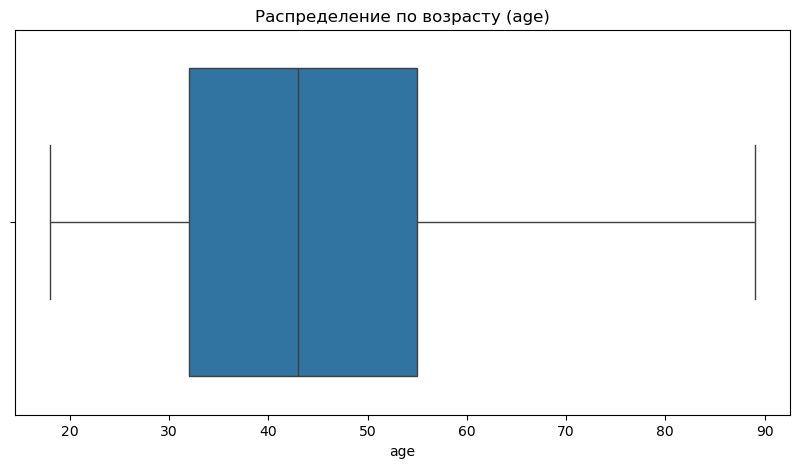

In [16]:
# Проверяем наличие выбросов в столбце "age"
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['age'])
plt.title('Распределение по возрасту (age)')
plt.show()

В данном случае выбросы отсутствуют. Теперь отобразим "ящик с усами" для столбца "educ", который представляет собой количество лет образования у человека:

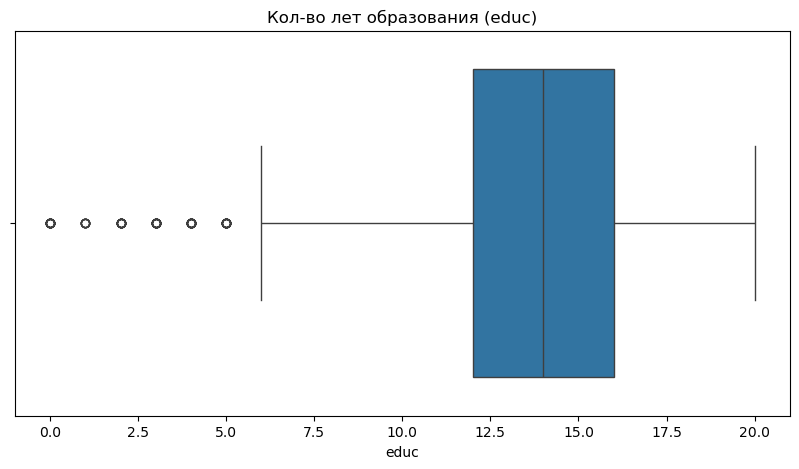

In [17]:
# Проверяем наличие выбросов в столбце "educ"
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['educ'])
plt.title('Кол-во лет образования (educ)')
plt.show()

Из графика видно, что в данных присутствуют значения, существенно отличающиеся от большинства в меньшую сторону. Однако, далеко не факт, что они представляют собой ошибку - столь малое количество лет обучения (0-5) может свидетельствовать о неоконченном среднем образовании, что, в свою очередь, соответствует уровню "0" категориальной переменной "degree". Проверим, нет ли в данных ошибки, и действительно ли все эти люди отмечены как неполучившие среднего образования:

In [18]:
count = len(df[(df['educ'] <= 5) & (df['degree'] != 0)])
count

0

Таким образом, данные не содержат явных ошибок, и среди людей с небольшим количеством лет обучения находятся только респонденты с неоконченным средним образованием. Очистка в этом случае не требуется, поскольку в ходе проверки мы убедились, что данные валидны.

In [19]:
# Очистка, если результат для модели будет лучше
#df = df[df['educ'] > 5]
#print('Размер датафрейма:', df.shape)
#print(df.iloc[:50])

Проверим на наличие выбросов еще один числовой фактор - переменную "hrs", характеризующую количество рабочих часов у респондентов:

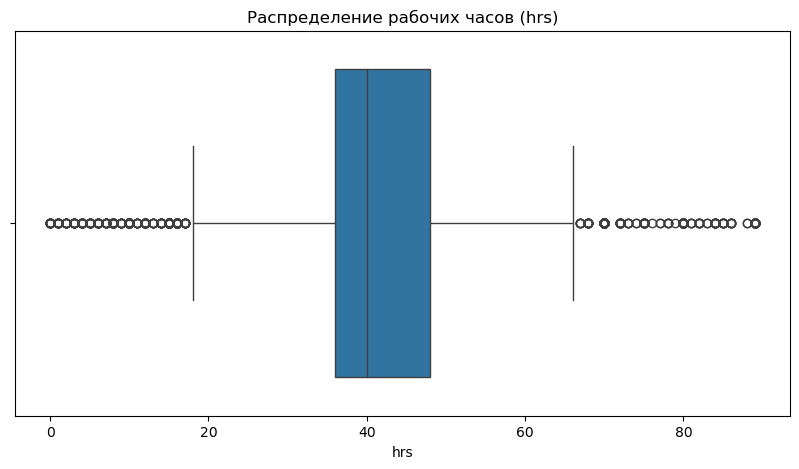

In [20]:
# Проверяем наличие выбросов в столбце "hrs"
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['hrs'])
plt.title('Распределение рабочих часов (hrs)')
plt.show()

Из графика мы видим, что в данных присутствуют экстремальные значения. Поэтому рациональным шагом будет ограничить значения количества рабочих часов снизу значением 10 (меньшее число часов работы говорит скорее о разовой/частичной подработке, чем о постоянном месте труда и, соответственно, дохода), а сверху значением 84 (поскольку максимальная разумная нагрузка - 7 дней в неделю по 12 часов; все, что превышает данное значение, является либо ошибкой в данных, либо крайне редко встречающимся случаем значительной переработки):

In [21]:
# Ограничиваем минимальное и максимальное значение рабочих часов (84 часа - максимальный предел для человека, 7 дней по 12 часов)
df['hrs'] = df['hrs'].clip(lower=10, upper=84)

Далее преобразуем переменную "marital" в бинарную со следующими возможными значениями: 0 - холост(-а), 1 - женат/замужем:

In [22]:
df['marital'] = df['marital'].apply(lambda x: 1 if x == 1 or x == 4 else 0)
df.head(20)

,age,educ,degree,marital,realrinc,year,hrs
0,31.0,16.0,3.0,0,42735.0,2010,55.0
1,23.0,16.0,3.0,0,3885.0,2010,45.0
6,46.0,16.0,2.0,0,42735.0,2010,45.0
8,31.0,14.0,1.0,1,100000.0,2010,40.0
10,31.0,14.0,2.0,0,12302.5,2010,26.0
12,58.0,12.0,1.0,1,19425.0,2010,40.0
19,35.0,16.0,3.0,0,42735.0,2010,50.0
20,49.0,12.0,1.0,0,28490.0,2010,40.0
21,56.0,13.0,1.0,1,28490.0,2010,25.0
24,35.0,17.0,4.0,1,34965.0,2010,20.0


# Описательная статистика

Далее необходимо отобразить наиболее важные статистические показатели датафрейма. Для числовых переменных это будут: кол-во значений, минимум и максимум, среднее арифметическое, медиана, 1-й и 3-й квартили, а также среднекваратическое отклонение. Для категориальных переменных: кол-во всех значений, кол-во уникальных значений, мода, ее численность, а также распределение в процентном соотношении. Эти показатели необходимы для дальнейшего анализа данных и решения последующих задач.

In [23]:
# Описательная статистика

# Для числовых столбцов
print("Числовые переменные:")
print(df[['age', 'educ', 'hrs']].describe().round(2))

# Для категориальных
print("\nКатегориальные переменные:")
print(df[['degree', 'marital']].astype('category').describe())

# Посмотрим распределение категориальных переменных
print("\nРаспределение категориальных переменных:")
print("degree (уровень образования): 0 - неоконченное среднее; 1 - среднее; 2 - младший специалист (колледж); 3 - бакалавр; 4 - магистратура")
print(df['degree'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

print("\nmarital (семейное положение): 1 - женат; 2 - вдовец; 3 - разведен; 4 - женат, но проживает раздельно; 5 - холост")
print(df['marital'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Числовые переменные:
            age      educ       hrs
count  10856.00  10856.00  10856.00
mean      43.83     14.34     40.93
std       13.89      2.92     13.75
min       18.00      0.00     10.00
25%       32.00     12.00     36.00
50%       43.00     14.00     40.00
75%       55.00     16.00     48.00
max       89.00     20.00     84.00

Категориальные переменные:
         degree  marital
count   10856.0    10856
unique      5.0        2
top         1.0        1
freq     4858.0     5449

Распределение категориальных переменных:
degree (уровень образования): 0 - неоконченное среднее; 1 - среднее; 2 - младший специалист (колледж); 3 - бакалавр; 4 - магистратура
degree
1.0    44.7%
3.0    24.2%
4.0    14.8%
2.0     8.9%
0.0     7.4%
Name: proportion, dtype: object

marital (семейное положение): 1 - женат; 2 - вдовец; 3 - разведен; 4 - женат, но проживает раздельно; 5 - холост
marital
1    50.2%
0    49.8%
Name: proportion, dtype: object


Промежуточные выводы:
1. Распределение по возрасту кажется относительно сбалансированным (средний возраст и медиана почти одинаковые), однако для точного определения степени симметрии необходимо визуализировать данные на гистограмме. Выборка включает все основные возрастные группы трудоспособного населения, что обеспечивает представительность анализа.
2. Среднее количество лет обучения составляет чуть больше 14 и почти равна медиане - это подтверждает, что, как минимум, половина респондентов завершили обучение в средней школе, после чего хотя бы частично продолжили получать образование (колледж или неполное высшее).
3. Большинство респондентов имеют среднее образование (44.7%), но при этом 39% получили высшее образование (бакалавриат или магистратура), что указывает на значительную долю людей, продолживших обучение после окончания школы.
4.  В среднем люди работают около 41 часа в неделю, при этом есть значительная вариативность — от 10 до 84 часов, что может отражать как неполную занятость, так и сверхурочную работу.
5.  Почти половина опрошенных (47.4%) состоит в браке, тогда как 30.6% никогда не были женаты, что отражает современные социальные тренды.

# Визуализация данных

Определим характер распределения числовых факторов датафрейма - таковыми являются "age", "educ" и "hrs":

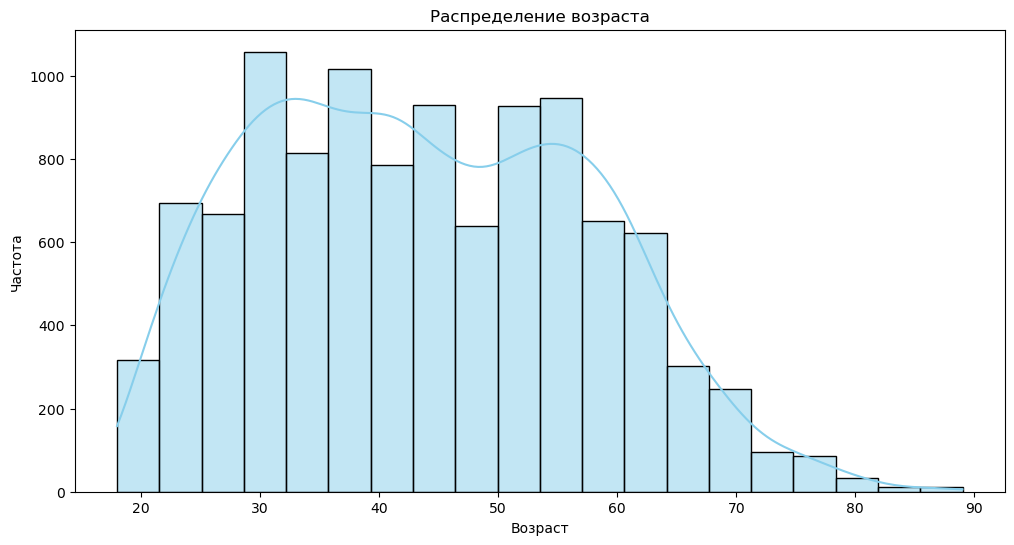

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show();

Распределение по возрасту похоже на нормальное с определенной правосторонней асимметрией, так как пожилых людей в выборке меньше, чем молодых.

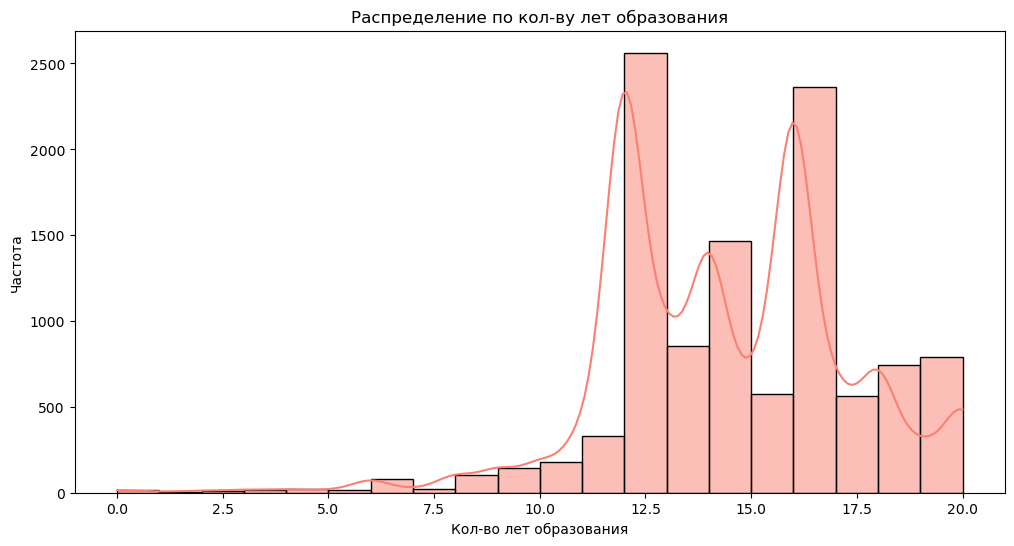

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df['educ'], kde=True, bins=20, color='salmon')
plt.title('Распределение по кол-ву лет образования')
plt.xlabel('Кол-во лет образования')
plt.ylabel('Частота')
plt.show();

Распределение по количеству лет образования является мультимодальным с некоторыми пиками (12 лет - школа, 14 лет - школа + колледж, 16 лет - школа + бакалавриат).

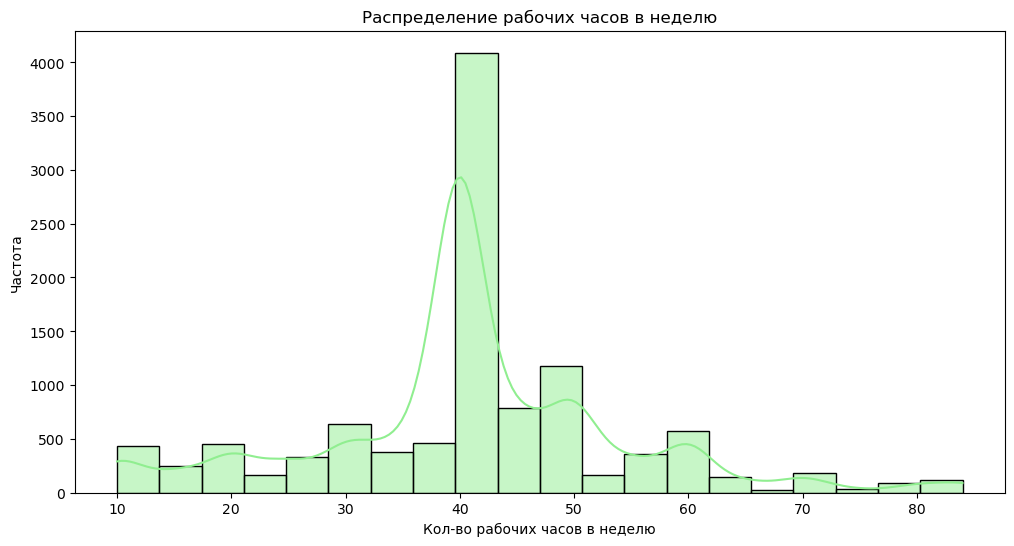

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df['hrs'], kde=True, bins=20, color='lightgreen')
plt.title('Распределение рабочих часов в неделю')
plt.xlabel('Кол-во рабочих часов в неделю')
plt.ylabel('Частота')
plt.show();

На гистограмме распределения рабочих часов в неделю наблюдается распределение с выраженным пиком, равным ~40 часов работы, что соответствует стандартной полной рабочей неделе. После пика наблюдается длинный правый хвост (как и в случае с возрастом, здесь имеет место правостороняя асимметрия), который указывает на наличие значительного числа респондентов с большим количеством рабочих часов (свыше 40, вплоть до 80+ часов).

Составим матрицу корреляций для выявления взаимосвязей между числовыми переменными:

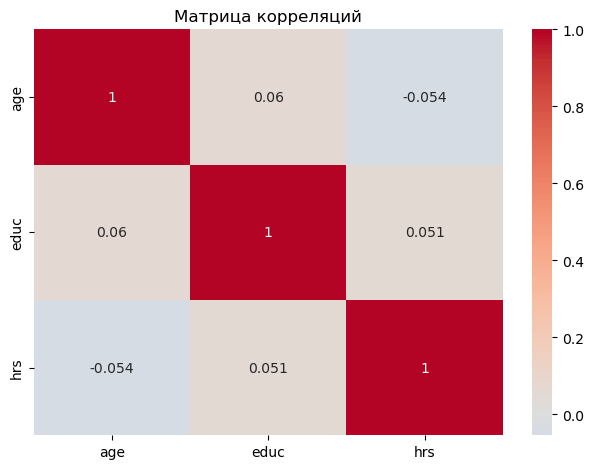

In [27]:
# Корреляционный анализ
corr_matrix = df[['age', 'educ', 'hrs']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')

plt.tight_layout()
plt.show();

Исходя из полученных результатов, между переменными наблюдается довольно-таки слабая связь, так как все коэффициенты корреляции близки к нулю (от -0.054 до 0.06), что указывает на отсутствие линейной зависимости между возрастом, длительностью получения образования и количеством рабочих часов.

Сгруппируем данные по уровню образования и найдем среднее кол-во рабочих часов для каждой категории:

In [28]:
education_levels = ['Неоконченное среднее', 'Среднее', 'Колледж', 'Высшее (бакалавриат)', 'Высшее (магистратура)']
mean_hrs_educ = df.groupby('degree')['hrs'].mean()
mean_hrs_educ

degree
0.0    38.652120
1.0    40.608893
2.0    40.755694
3.0    41.621426
4.0    42.030492
Name: hrs, dtype: float64

Визуализируем результат:

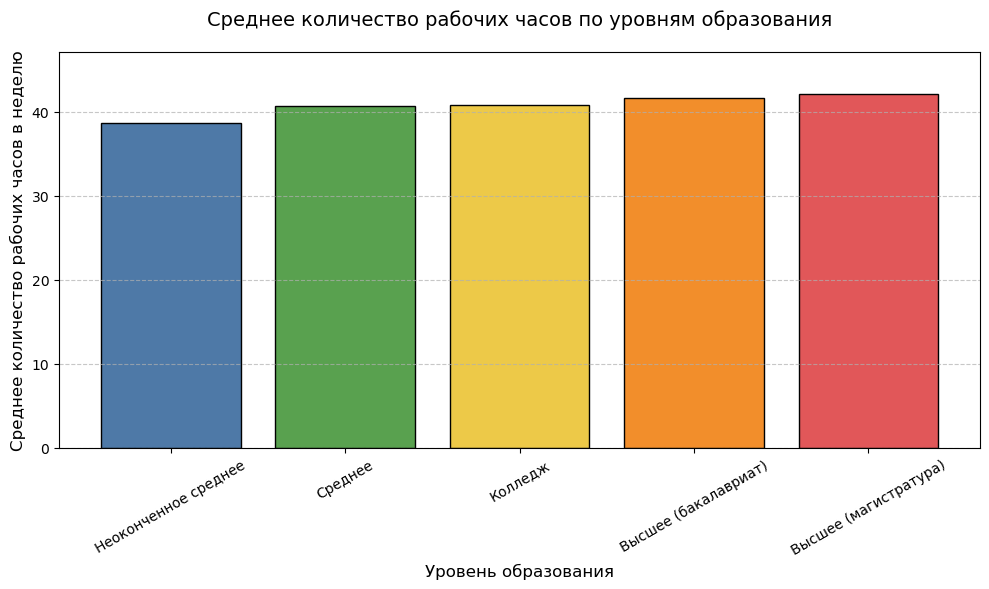

In [29]:
plt.figure(figsize=(10, 6))
bars = plt.bar(education_levels, mean_hrs_educ, color=['#4e79a7', '#59a14f', '#edc948', '#f28e2b', '#e15759'], edgecolor='black')
plt.title('Среднее количество рабочих часов по уровням образования', pad=20, fontsize=14)
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Среднее количество рабочих часов в неделю', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(mean_hrs_educ) + 5)
plt.tight_layout()
plt.show();

Как мы видим, различия в уровнях средних значений кол-ва рабочих часов являются довольно небольшими. Однако, нетрудно заметить определенную тенденцию - чем выше уровень образования, тем больше среднее количество рабочих часов. Самые низкие показатели у групп с неоконченным средним (38,6 часов) и средним образованием (40,6 часов). Самые высокие показатели у людей с магистратурой (около 42 часов) и бакалавриатом (41,6 часов). Вполне вероятно, что высшее образование часто связано с профессиональной занятостью, требующей полного рабочего дня. Наоборот, люди не имеющие высшего образования, чаще работают на частичной занятости или в низкооплачиваемых сферах.

Теперь сгруппируем данные по семейному положению и аналогично найдем среднее кол-во рабочих часов для каждой категории:

In [30]:
marital_statuses = ['Не женат/не замужем', 'Женат/замужем']
mean_hrs_marital = df.groupby('marital')['hrs'].mean()
mean_hrs_marital

marital
0    40.426484
1    41.434575
Name: hrs, dtype: float64

Визуализируем результат:

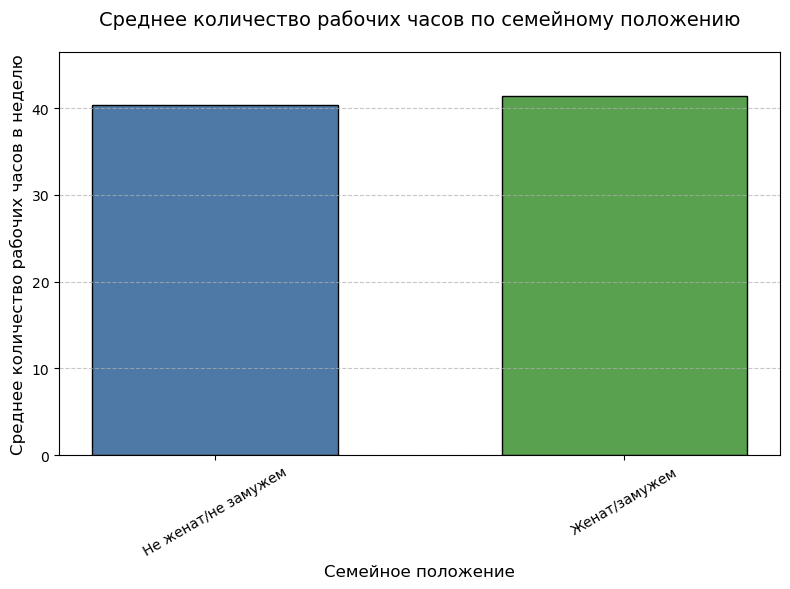

In [31]:
plt.figure(figsize=(8, 6))
bars = plt.bar(marital_statuses, mean_hrs_marital, width=0.6, color=['#4e79a7', '#59a14f', '#edc948', '#f28e2b', '#e15759'], edgecolor='black')
plt.title('Среднее количество рабочих часов по семейному положению', pad=20, fontsize=14)
plt.xlabel('Семейное положение', fontsize=12)
plt.ylabel('Среднее количество рабочих часов в неделю', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(mean_hrs_marital) + 5)
plt.tight_layout()
plt.show();

Из представленного графика видно, что женатые и замужние работают в среднем больше часов, чем неженатые и незамужние с небольшой разницей в 1 час. По этой причине можно сделать вывод, что семейное положение не оказывает заметного влияния на среднее количество рабочих часов в неделю, а существующее небольшое различие может объясняться финансовыми обязательствами перед семьей и зачастую необходимостью содержать детей.

Рассмотрим уровень дохода в зависимости от образования.

In [32]:
education_levels = ['Неоконченное среднее', 'Среднее', 'Колледж', 'Высшее (бакалавриат)', 'Высшее (магистратура)']
mean_hrs_educ = df.groupby('degree')['realrinc'].mean()
mean_hrs_educ

degree
0.0    32081.234414
1.0    31201.990325
2.0    31212.973344
3.0    40534.471502
4.0    45984.034536
Name: realrinc, dtype: float64

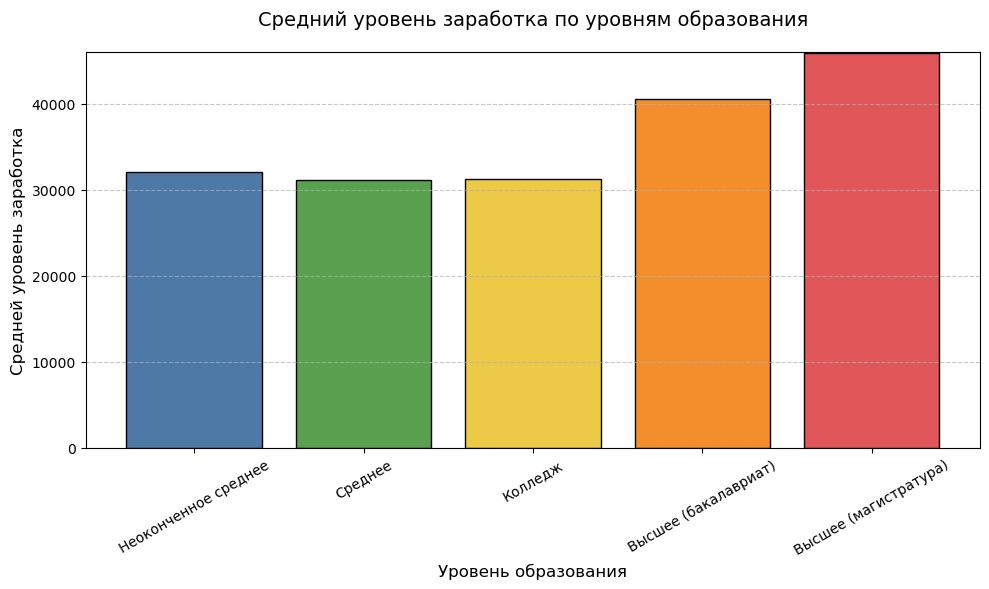

In [33]:
plt.figure(figsize=(10, 6))
bars = plt.bar(education_levels, mean_hrs_educ, color=['#4e79a7', '#59a14f', '#edc948', '#f28e2b', '#e15759'], edgecolor='black')
plt.title('Средний уровень заработка по уровням образования', pad=20, fontsize=14)
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Средней уровень заработка', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(mean_hrs_educ) + 5)
plt.tight_layout()
plt.show();

Судя по средним показателям доход зависит от уровня образования.

Рассмотрим уровень дохода в зависимости от семейного положения.

In [34]:
marital_statuses = ['Не в браке', 'В браке']
mean_hrs_marital = df.groupby('marital')['realrinc'].mean()
mean_hrs_marital

marital
0    32891.369798
1    38508.859791
Name: realrinc, dtype: float64

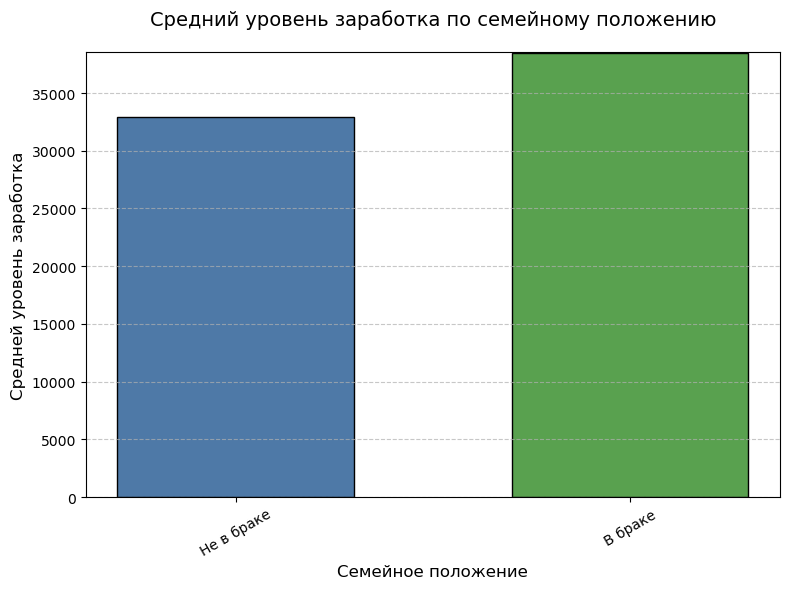

In [35]:
plt.figure(figsize=(8, 6))
bars = plt.bar(marital_statuses, mean_hrs_marital, width=0.6, color=['#4e79a7', '#59a14f', '#edc948', '#f28e2b', '#e15759'], edgecolor='black')
plt.title('Средний уровень заработка по семейному положению', pad=20, fontsize=14)
plt.xlabel('Семейное положение', fontsize=12)
plt.ylabel('Средней уровень заработка', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(mean_hrs_marital) + 5)
plt.tight_layout()
plt.show();

Исходя из этой гистограммы видно, что если человек состоит в браке, то в среднем он зарабатывает больше.

Составим матрицу корреляций для выявления взаимосвязей между числовыми переменными:

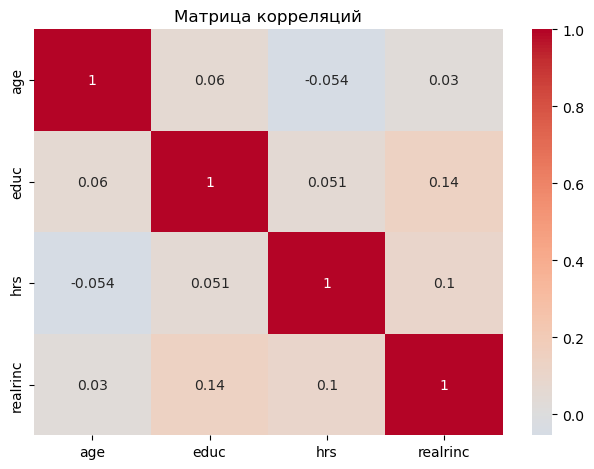

In [36]:
corr_matrix = df[['age', 'educ', 'hrs', 'realrinc']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')

plt.tight_layout()
plt.show();

# Нормализация данных

Применим one-hot кодирование для переменной "degree":

In [37]:
pd.get_dummies(df['degree'], prefix='degree', drop_first=True, dtype=int)

,degree_1.0,degree_2.0,degree_3.0,degree_4.0
0,0,0,1,0
1,0,0,1,0
6,0,1,0,0
8,1,0,0,0
10,0,1,0,0
...,...,...,...,...
19946,0,0,1,0
19948,1,0,0,0
19949,0,0,1,0
19950,0,0,1,0


Проведем масштабирование числовых факторов для дальнейшего построения модели.

Будем масштабировать следующие переменные:
<ul><li>age (возраст);</li>
<li>educ (годы образования);</li>
<li>hrs (рабочие часы в неделю);</li>
</ul>

In [38]:
df[['age_std', 'educ_std', 'hrs_std', 'realrinc_std']] = StandardScaler().fit_transform(df[['age', 'educ', 'hrs', 'realrinc']])

Проверим результаты нормализации, визуализировав соответствующие гистограммы:

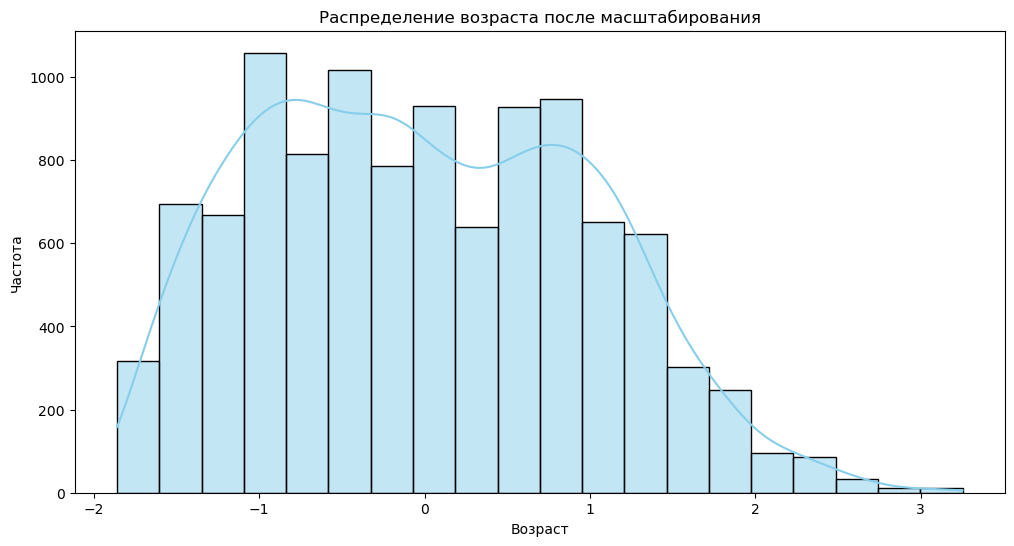

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(df['age_std'], kde=True, bins=20, color='skyblue')
plt.title('Распределение возраста после масштабирования')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show();

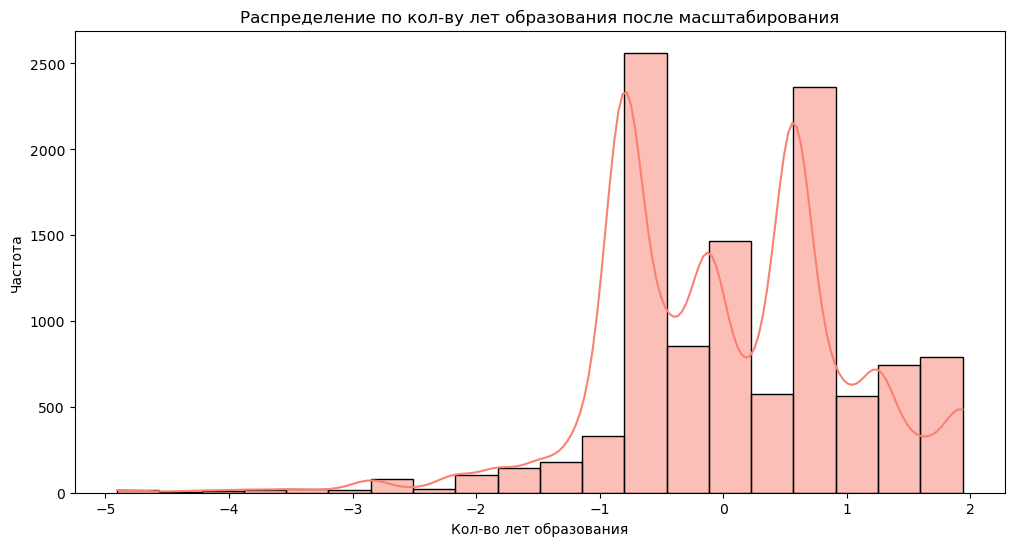

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(df['educ_std'], kde=True, bins=20, color='salmon')
plt.title('Распределение по кол-ву лет образования после масштабирования')
plt.xlabel('Кол-во лет образования')
plt.ylabel('Частота')
plt.show();

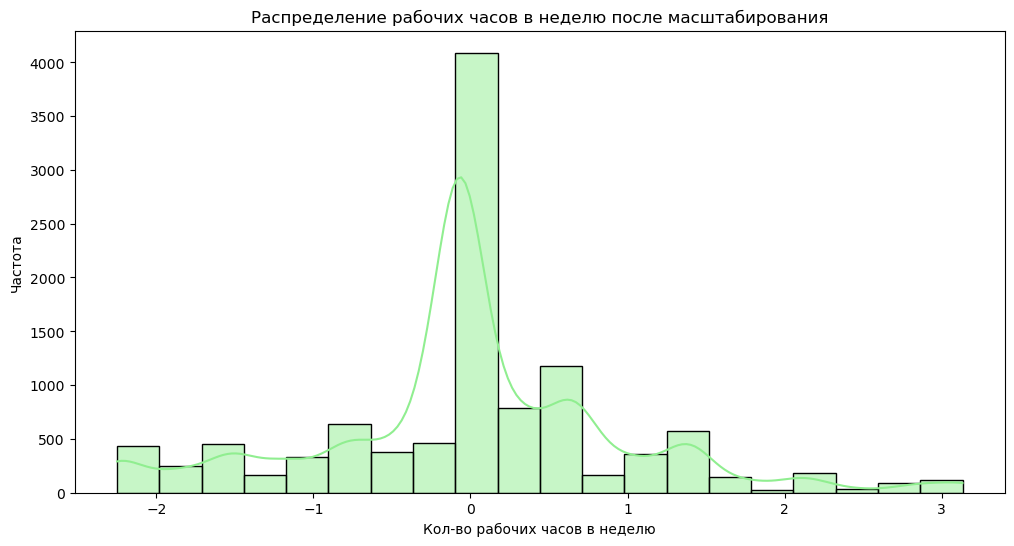

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(df['hrs_std'], kde=True, bins=20, color='lightgreen')
plt.title('Распределение рабочих часов в неделю после масштабирования')
plt.xlabel('Кол-во рабочих часов в неделю')
plt.ylabel('Частота')
plt.show();

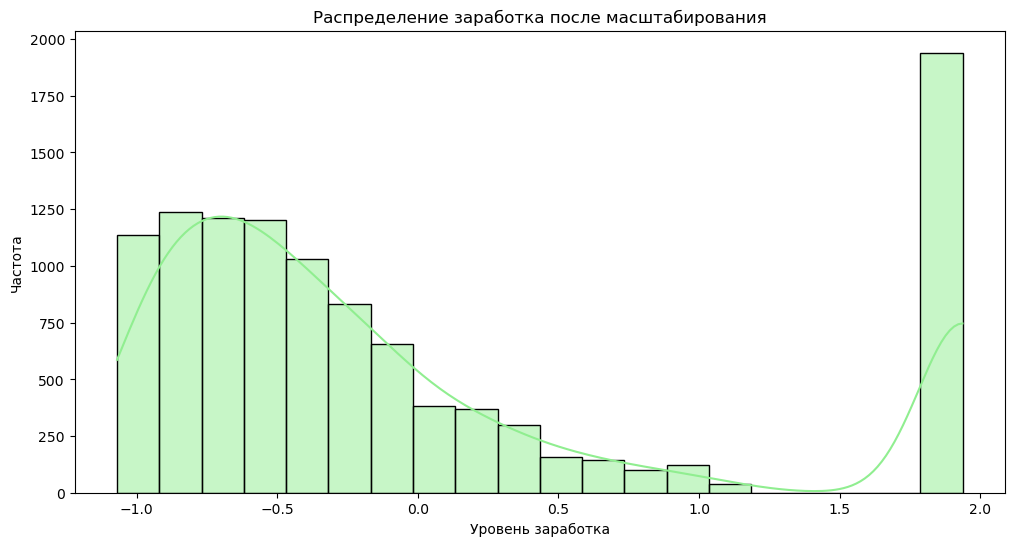

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(df['realrinc_std'], kde=True, bins=20, color='lightgreen')
plt.title('Распределение заработка после масштабирования')
plt.xlabel('Уровень заработка')
plt.ylabel('Частота')
plt.show();

In [43]:
df.head()

,age,educ,degree,marital,realrinc,year,hrs,age_std,educ_std,hrs_std,realrinc_std
0,31.0,16.0,3.0,0,42735.0,2010,55.0,-0.923623,0.567806,1.023247,0.211562
1,23.0,16.0,3.0,0,3885.0,2010,45.0,-1.499755,0.567806,0.295864,-0.958594
6,46.0,16.0,2.0,0,42735.0,2010,45.0,0.156624,0.567806,0.295864,0.211562
8,31.0,14.0,1.0,1,100000.0,2010,40.0,-0.923623,-0.116372,-0.067827,1.936377
10,31.0,14.0,2.0,0,12302.5,2010,26.0,-0.923623,-0.116372,-1.086163,-0.705060


In [44]:
import statsmodels.api as sm

Построим многофакторную модель. Доход ~ Возраст, количество лет образования и семейного положения.

In [45]:
X = df[['age', 'educ', 'marital']]
y = df['realrinc']

In [46]:
X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

y_pred = model_sm.predict(X_sm)

In [47]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     93.35
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           1.20e-59
Time:                        23:50:35   Log-Likelihood:            -1.2828e+05
No. Observations:               10856   AIC:                         2.566e+05
Df Residuals:                   10852   BIC:                         2.566e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.066e+04   1815.615      5.873      0.0

Как видим больше всего на уровень заработка влияет именно количество лет образования, возраст и семейное положение также имеют большое влияние.

Построим расширенную модель, добавим количество рабочих часов.

In [48]:
X = df[['age', 'educ', 'marital', 'hrs']]
y = df['realrinc']

In [49]:
X_sm = sm.add_constant(X)

model_extended = sm.OLS(y, X_sm).fit()

y_pred = model_extended.predict(X_sm)

In [50]:
print(model_extended.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     94.59
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           3.17e-79
Time:                        23:50:35   Log-Likelihood:            -1.2823e+05
No. Observations:               10856   AIC:                         2.565e+05
Df Residuals:                   10851   BIC:                         2.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1773.3102   2022.966      0.877      0.3

Сравним простую и расширенную модели.

In [51]:
from statsmodels.stats.anova import anova_lm
anova_lm(model_sm, model_extended)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,10852.0,1.166536e+13,0.0,NaN,NaN,NaN
1,10851.0,1.156320e+13,1.0,1.021609e+11,95.868604,1.521969e-22


Как видим p-value очень низкое, значит расширенная модель лучше упрощённой.

Исходя из полученных результатов можно сделать вывод о том, что количество рабочих часов также достаточно сильно влияет на уровень заработка. Однако в целом характеристики модели, такие как R-квадрат и F-статистика указывают на малую предсказательную способность модели.

# Выводы

Анализ показал, что на доход наибольшее влияние оказывает количество лет образования. Также статистически значимыми факторами являются возраст (до 50 лет) и семейное положение (состоит ли человек в браке). Однако общее качество модели остаётся низким, что указывает на ограниченность учёта только базовых демографических характеристик. Доход формируется под влиянием множества индивидуальных особенностей, таких как опыт, профессиональные навыки, мотивация, здоровье, окружение и прочие факторы, которые не отражены в используемой модели. Поэтому точно предсказать доход на основе нескольких переменных невозможно.